In [1]:
from pixell import enmap, curvedsky
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import importlib
import pandas as pd
import tools
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
lensed_cmb = pd.read_csv('maps/Colin/lensed_cmb_cl.csv')
websky_ksz_lt = pd.read_csv('maps/websky/ksz_lt_cl.csv')
websky_ksz_ri = pd.read_csv('maps/websky/ksz_ri_cl.csv')
colin_ksz_lt = pd.read_csv('maps/Colin/ksz_lt_cl.csv')

In [ ]:
# noise map ps


In [4]:
Range = np.arange(1000, 8000, 1)
R = (Range*(Range+1))/(2*math.pi)

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl$')

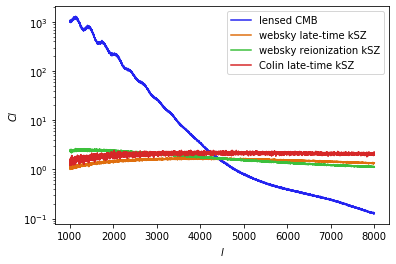

In [5]:
plt.plot(lensed_cmb['ell'][Range], R*lensed_cmb['Cl'][Range])
plt.plot(websky_ksz_lt['ell'][Range], R*websky_ksz_lt['Cl'][Range])
plt.plot(websky_ksz_ri['ell'][Range], R*websky_ksz_ri['Cl'][Range])
plt.plot(colin_ksz_lt['ell'][Range], R*colin_ksz_lt['Cl'][Range])
plt.legend(['lensed CMB', 'websky late-time kSZ', 'websky reionization kSZ', 'Colin late-time kSZ'])
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$l$')
plt.ylabel('$Cl$')

In [6]:
lensed_cmb['ell'].values[Range]

array([1000, 1001, 1002, ..., 7997, 7998, 7999])

In [7]:
smooth_ellmin, smooth_ellmax = 1000, 7000
smooth_width = 1


bin_width = 20
ellmin, ellmax = int(smooth_ellmin - bin_width/2), int(smooth_ellmax + bin_width/2)
ells = np.arange(ellmin, ellmax+1, 1)

smooth_ells,s_lensed_cmb = tools.bin_smooth(ells, lensed_cmb['Cl'].values[ells], bin_width).smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells,s_websky_ksz_lt = tools.bin_smooth(ells, websky_ksz_lt['Cl'].values[ells], bin_width).smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells,s_websky_ksz_ri = tools.bin_smooth(ells, websky_ksz_ri['Cl'].values[ells], bin_width).smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells,s_colin_ksz_lt = tools.bin_smooth(ells, colin_ksz_lt['Cl'].values[ells], bin_width).smooth(smooth_ellmin, smooth_ellmax, smooth_width)

In [8]:
(smooth_ells*(smooth_ells+1))/(2*math.pi)

array([ 159314.09803499,  159632.72623106,  159951.67273701, ...,
       7793022.74342431, 7795250.27600783, 7797478.12690123])

Text(0.5, 0, '$l$')

Text(0, 0.5, '$(\\ell(\\ell+1))/(2\\pi)C_{\\ell}^{TT}$')

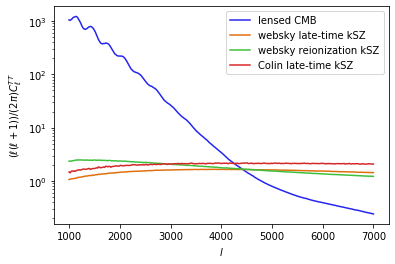

In [9]:
plt.plot(smooth_ells, (smooth_ells*(smooth_ells+1))/(2*math.pi)*s_lensed_cmb)
plt.plot(smooth_ells, (smooth_ells*(smooth_ells+1))/(2*math.pi)*s_websky_ksz_lt)
plt.plot(smooth_ells, (smooth_ells*(smooth_ells+1))/(2*math.pi)*s_websky_ksz_ri)
plt.plot(smooth_ells, (smooth_ells*(smooth_ells+1))/(2*math.pi)*s_colin_ksz_lt)
plt.legend(['lensed CMB', 'websky late-time kSZ', 'websky reionization kSZ', 'Colin late-time kSZ'])
plt.xlabel('$l$')
plt.ylabel('$(\ell(\ell+1))/(2\pi)C_{\ell}^{TT}$')
plt.yscale('log')
plt.savefig('plots/ps.png')

In [36]:
cl

array([1.86594878e-05, 4.77972869e-03, 4.81523646e+02, ...,
       1.14833390e-11, 9.54900732e-12, 1.17494152e-11])